<a href="https://colab.research.google.com/github/ydpajaro/regresion_lineal-Parte_A/blob/main/Lab_regresi%C3%B3n_lineal_Parte_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

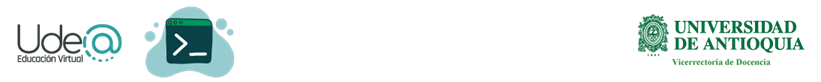

---
# Laboratorio Regresión Lineal
## **Parte A:** estimación de parámetros y sobre-entrenamiento

**Laboratorio Tratamiento de Señales III**

**Integrantes:** 

   -Stiven Velásquez López
   
   -Yeiner David Pajaro Otero
   
**Facultad de Ingeniería**

**Universidad de Antioquia**

**Autor: Pablo Alejandro Alvarado Duran**

---
# Trabajo de laboratorio

Como trabajo de laboratorio vamos a entrenar un modelo de regresión para el caso **univariado** $y_n = f(x_n) + \epsilon$, donde la salida $ y_n∈ \mathbb{R}$, y la entrada $ x_n ∈ \mathbb{R}$. El procedimiento es el siguiente:

 1. Descargar una base de datos para regresión y visualizarla (por ejemplo buscar en https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

 2. Dividir la base de datos en 70% entrenamiento y 30% test, utilizando primero una partición aleatoria, y luego una partición secuencial. Graficar ambos tipos de particiones.

 3. Seleccione dos funciones base ya implementadas (por ejemplo: polinomial, exponencial, y coseno), y además implemente un nuevo tipo de función base que usted eliga, de manera que pueda definir tres modelos diferentes de regresión lineal. 
 
A continuación, establezca la cantidad de funciones base $M$ necesarias para que el modelo se sobreentrene. Seguir el siguiente procedimiento para $M = 1, 2, \cdots, M_{\text{max}}$.

 4. Inferir los parámetros para cada modelo utilizando máxima verosimilitud. 

 5. Grafique las predicciones de los modelos entrenados, junto con los datos de entrenamiento y test.

 5. Calcule el RMSE entre las predicciones de cada modelo `y_pred` y los datos de test `y_test`, así como el RMSE entre las predicciones de cada modelo `y_pred` y los datos de entrenamiento `y_train`. Grafique los errores (eje y) vs el número de caracteristicas (eje x). En base a estas gráficas establezca: 
  - ¿qué modelo presenta mejor capacidad de generalización? argumente.

 <strong>1. DESCARGAR UNA BASE DE DATOS PARA REGRESIÓN Y VISUALIZARLA (POR EJEMPLO BUSCAR EN https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?resource=download). </strong>

In [1]:
#Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
import sklearn as skl

In [2]:
url ='https://raw.githubusercontent.com/ydpajaro/regresion_lineal-Parte_A/main/DailyDelhiClimateTrain.csv'
df = pd.read_csv(url)
muestras = pd.read_csv (url, sep = ",")['meantemp']
y = muestras.to_numpy() # Conversión de Dataframe a Array


Gráficamos el conjunto de datos tomando solamente la temperatura promedio del dataset.

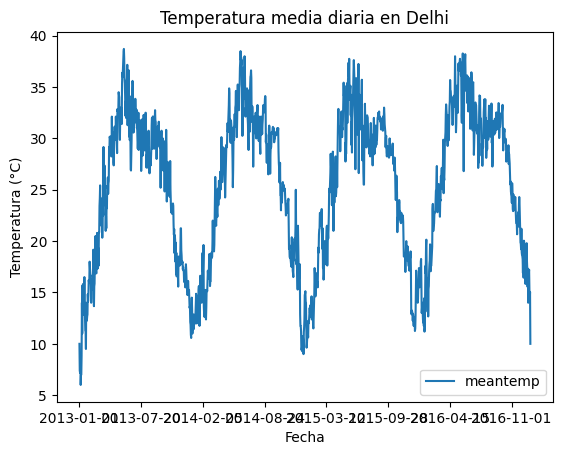

In [3]:
time = np.linspace(0,1462,1462) #Creamos el vector de tiempo 
df.plot(x='date', y='meantemp')
plt.title('Temperatura media diaria en Delhi')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.show()

 <strong>2. DIVIDIR LA BASE DE DATOS EN 70% ENTRENAMIENTO Y 30% TEST, UTILIZANDO PRIMERO UNA PARTICIÓN ALEATORIA, Y LUEGO UNA PARTICIÓN SECUENCIAL. GRAFICAR AMBOS TIPOS DE PARTICIONES.</strong>

<strong>Partición aleatoria</strong>

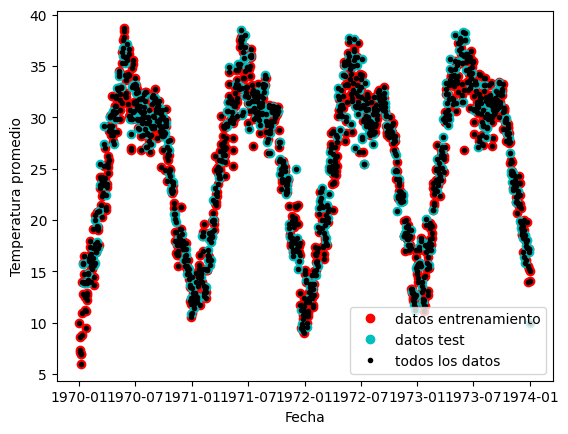

In [4]:
# Convertir la columna 'date' en formato datetime
# df['date'] = pd.to_datetime(df['date'])

# Seleccionar la columna 'meantemp' como variable dependiente y las demás como independientes
# X = df.drop('meantemp', axis=1)
# y = df['meantemp']

# Partición aleatoria
X_train, X_test, y_train, y_test = train_test_split(time, y, test_size=0.3, random_state=42)

# Graficar los datos
plt.plot_date(X_train, y_train, 'or')
plt.plot(X_test, y_test, 'oc')
plt.plot(time, y, '.k')
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])
plt.xlabel('Fecha')
plt.ylabel('Temperatura promedio')
plt.show()

<strong>Partición secuencial</strong>

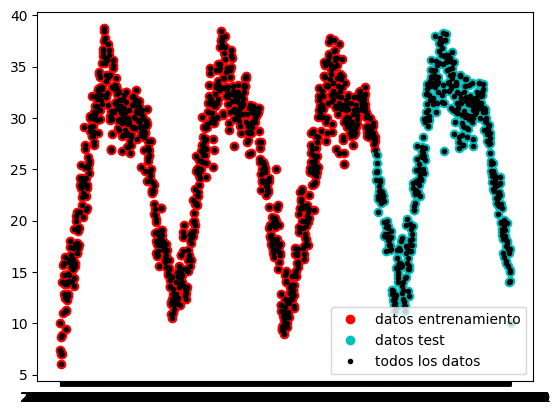

In [5]:
# Ordenar el dataframe por fecha
df_sorted = df.sort_values(by='date')

# Seleccionar el 70% de las filas para entrenamiento y el 30% restante para prueba
train_seq = df_sorted.iloc[:int(len(df_sorted)*0.7)]
test_seq = df_sorted.iloc[int(len(df_sorted)*0.7):]

# Graficar los datos
import matplotlib.pyplot as plt

plt.plot(train_seq['date'], train_seq['meantemp'], 'or')
plt.plot(test_seq['date'], test_seq['meantemp'], 'oc')
plt.plot(df_sorted['date'], df_sorted['meantemp'], '.k')
plt.legend(['datos entrenamiento', 'datos test', 'todos los datos'])
plt.show()


<p style="text-align: justify;">

<strong>Ventajas y desventajas de la forma secuencial vs la forma aleatoria</strong>

Tanto la forma secuencial como la forma aleatoria se refieren al orden en que se presentan los datos al modelo durante el entrenamiento en aprendizaje automático.

La forma secuencial implica presentar los datos al modelo en un orden fijo, generalmente en el mismo orden en que aparecen en el conjunto de datos. Esto significa que el modelo ve cada muestra una vez en cada época, en el mismo orden. La principal ventaja de la forma secuencial es que es determinista y reproduce el mismo entrenamiento cada vez que se ejecuta, lo que facilita la depuración y el ajuste de los hiperparámetros. Sin embargo, la forma secuencial también puede llevar a que el modelo se sobreajuste a patrones específicos en el conjunto de datos y que no sea tan generalizable.

Por otro lado, la forma aleatoria implica presentar los datos en un orden aleatorio durante cada época de entrenamiento. Esto significa que el modelo ve las muestras en un orden diferente en cada época, lo que puede ayudar a prevenir el sobreajuste y a mejorar la generalización del modelo. La principal desventaja de la forma aleatoria es que puede ser más difícil de depurar y ajustar los hiperparámetros debido a la variabilidad en el entrenamiento.

Para ambos casos de formas de representación se lora observar una predicción exacta para el modelo presentado en la primera gráfica por lo que ambos no se diferencia de alguna manera por lo que se podría decir que ambos modelos se podrían aceptar para este tipo de situació, ya que no presentan un sobreajuste.
</p>



<strong>
 3. SELECCIONE DOS FUNCIONES BASE YA IMPLEMENTADAS (POR EJEMPLO: POLINOMIAL, EXPONENCIAL, Y COSENO), Y ADEMÁS IMPLEMENTE UN NUEVO TIPO DE FUNCIÓN BASE QUE USTED ELIGA, DE MANERA QUE PUEDA DEFINIR TRES MODELOS DIFERENTES DE REGRESIÓN LINEAL. </strong>

In [6]:
def escalonada_carac(X, K):
    # Extraer características utilizando la función escalonada
    # X: N x D, vector de entradas 
    # K: escalar, número de características a extraer
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    
    # Calcular matriz Phi
    threshold = np.linspace(np.min(X), np.max(X), K)
    for k in range(1, K+1):
        Phi[:, k] = np.where(X >= threshold[k-1], 1, 0)
        
    return Phi

In [7]:
def trigo_carac(X, K):
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
      if k%2 ==0:
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X) 
      else:
        Phi[:,k] = np.sin(2*np.pi*F[k-1]*X)
    return Phi

In [8]:
def gauss_carac(X, K):
    # Extraer características utilizando la función gaussiana
    # X: N x D, vector de entradas 
    # K: escalar, número de características a extraer
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(np.min(X), np.max(X), K)
    sig2 = (np.max(X) - np.min(X))**2/(2*K)
    
    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(X - mu[k-1])**2/sig2)
        
    return Phi

In [9]:
def plot_caracteristicas(X, Phi, K):
  legend = []
  for i in range(K+1):
    plt.plot(X, Phi[:, i])
    legend.append(r'$\phi_' + str(i) +'$(x)'  )
  plt.legend(legend);
  plt.grid(True)

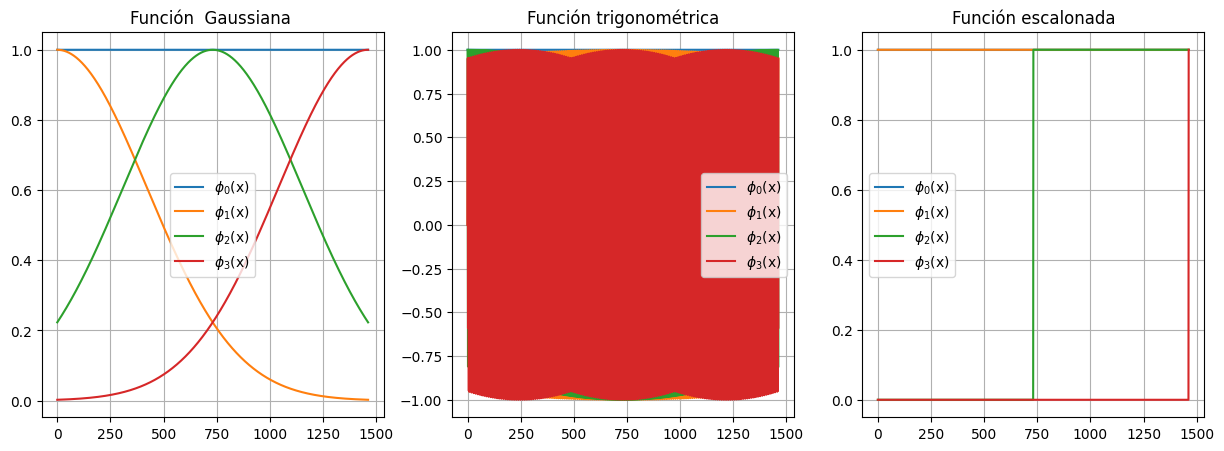

In [10]:
# Impresión de las funciones base 

K = 3
Phi_gauss = gauss_carac(time, K)
Phi_trigo = trigo_carac(time, K)
Phi_expo = escalonada_carac(time, K)

# graficar resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_caracteristicas(time, Phi_gauss, K)
plt.title('Función  Gaussiana ');

plt.subplot(1,3,2)
plot_caracteristicas(time, Phi_trigo, K)
plt.title('Función trigonométrica');


plt.subplot(1,3,3)
plot_caracteristicas(time, Phi_expo, K)
plt.title('Función escalonada');

<strong> 4. INFERIR LOS PARÁMETROS PARA CADA MODELO UTILIZANDO MÁXIMA VEROSIMILITUD.</strong>

Empezamos tomando valores con K=3 al gráficar se observa que la predicción no es fiel a la función real por lo que se procede a aumentar el grado del polinomio para encontrar la máxima exactitud entre los datos de predicción y la función real, se encuentra que para k=100 en adelante podremos ver la grafica con los datos de predicción bastante similar, en los 3 conjuntos de predicción: Gaussiana, trigonométrica y escalonada. 

In [11]:
def inferencia_max_vero_carac(Phi, y):
    # máxima verosimilitud usando caracteristicas
    # Phi: N x D, caracteristicas
    # y: N x 1, datos de salida observados
    # return: D x 1, vector de parametros estimados 
    
    kappa = 1e-09 # jitter
    D = Phi.shape[1]  
    Pt = Phi.T @ y # Phi^T*y
    PP = Phi.T @ Phi + kappa*np.eye(D) # Phi^T*Phi + kappa*I
    C = sp.linalg.cho_factor(PP)
    theta_ml = sp.linalg.cho_solve(C, Pt) # inv(Phi^T*Phi)*Phi^T*y
    return theta_ml

In [12]:
K=100

#-----------------------Función Gaussiana --------------------------------
Phi_gaussiana = gauss_carac(X_train, K) # transformación de datos con función Gaussiana
theta_ml3_gaussiana = inferencia_max_vero_carac(Phi_gaussiana, y_train)

Phi_test_gaussiana = gauss_carac(time, K) # características todos los datos
y_pred_gaussiana = Phi_test_gaussiana @ theta_ml3_gaussiana # predicción

#--------------------------------------------------------------------

#-----------------------Función trigonométrica-----------------------
Phi_trigo = trigo_carac(X_train, K) # transformación de datos con función Gaussiana
theta_ml3_trigo = inferencia_max_vero_carac(Phi_trigo, y_train)

Phi_test_trigo = trigo_carac(time, K) # características todos los datos
y_pred_trig = Phi_test_trigo @ theta_ml3_trigo # predicción
#-------------------------------------------------------------------------

#--------------------Función escalonada --------------------------------
Phi_escalonada = escalonada_carac(X_train, K) # transformación de datos con función Gaussiana
theta_ml3_escalonada = inferencia_max_vero_carac(Phi_escalonada, y_train)

Phi_test_escalonada = escalonada_carac(time, K) # características todos los datos
y_pred_escalonada = Phi_test_escalonada @ theta_ml3_escalonada # predicción
#-------------------------------------------------------------------


<strong> 5. Grafique las predicciones de los modelos entrenados, junto con los datos de entrenamiento y test.</strong>

In [13]:
def plot_prediccion(X, prediccion):

  plt.plot(X_train, y_train, '.k')
  plt.plot(X, y, lw=2)
  plt.plot(X, prediccion, '--', lw=2)
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.legend(['datos entrenamiento', 'función real', 'predicción'])

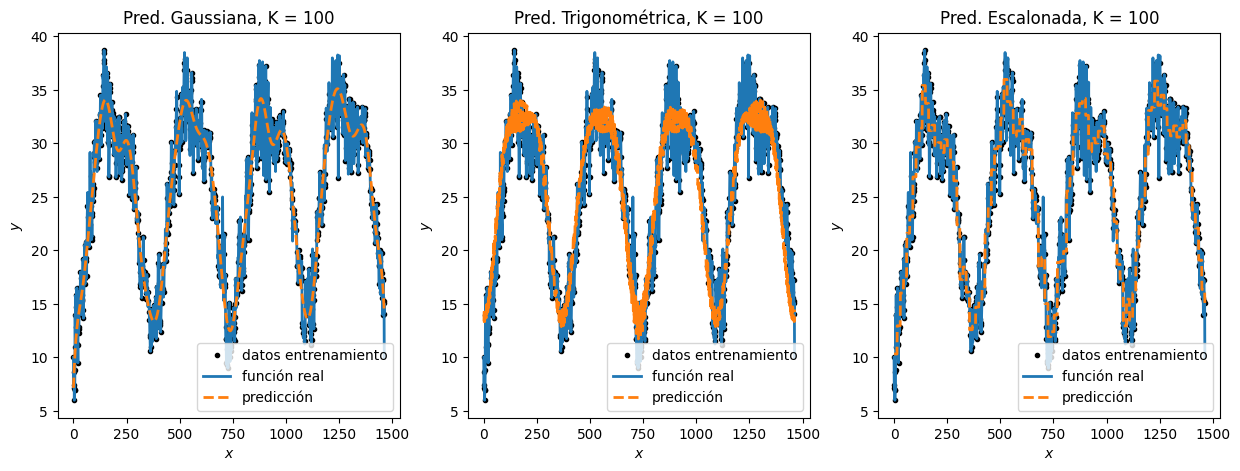

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plot_prediccion(time, y_pred_gaussiana)
plt.title('Pred. Gaussiana, K = ' + str(K));

plt.subplot(1,3,2)
plot_prediccion(time, y_pred_trig)
plt.title('Pred. Trigonométrica, K = ' + str(K));

plt.subplot(1,3,3)
plot_prediccion(time,y_pred_escalonada)
plt.title('Pred. Escalonada, K = ' + str(K));

De la gráfica anterior podemos notar la predicción que menos se ajusta al modelo de la función real es la predicción trigonometrica; la predicción trigonométrica se ajusta menos a la función real cuando se utiliza un número pequeño de funciones base, en comparación con la predicción gaussiana y la predicción escalonada. Esto se debe a que la función trigonométrica tiene una forma periódica, lo que significa que se requieren múltiples funciones seno y coseno para modelar adecuadamente una función no periódica. Si se utiliza un número insuficiente de funciones trigonométricas, la predicción resultante puede tener una forma muy simplista que no se ajusta bien a la función original. Por otro lado, la predicción gaussiana y la predicción escalonada pueden proporcionar una buena aproximación de la función original con un número menor de funciones base. 

 <strong>6. CALCULE EL RMSE ENTRE LAS PREDICCIONES DE CADA MODELO `Y_PRED` Y LOS DATOS DE TEST `Y_TEST`, ASÍ COMO EL RMSE ENTRE LAS PREDICCIONES DE CADA MODELO `Y_PRED` Y LOS DATOS DE ENTRENAMIENTO `Y_TRAIN`. GRAFIQUE LOS ERRORES (EJE Y) VS EL NÚMERO DE CARACTERISTICAS (EJE X). EN BASE A ESTAS GRÁFICAS ESTABLEZCA: 
  - ¿QUÉ MODELO PRESENTA MEJOR CAPACIDAD DE GENERALIZACIÓN? ARGUMENTE.
</strong>

In [15]:
def rmse(y, y_pred):
  # Calculo función de error
  y = y.flatten()
  y_pred = y_pred.flatten()
  N = y.shape[0]
  difer = (y - y_pred)**2
  return np.sqrt((1.0/N) * np.sum(difer))

In [16]:
def rmse_k(carac,K_max,titulo):

  rmse_train = []
  rmse_test = []
  K_vector = []
  #carac = expo_carac # seleccionar tipo de caracteristicas (poli, expo, cos)
  #K_max = 200 # cantidad máxima de caracteristicas

  for i in range(1, K_max,5):
    K = i 

    Phi_train = carac(X_train, K) 
    theta_ml = inferencia_max_vero_carac(Phi_train, y_train)

    y_pred = Phi_train @ theta_ml # predicción
    rmse_train.append(rmse(y_train, y_pred)) # medir error

    # predicción sobre datos de test 
    Phi_test = carac(X_test, K)
    y_pred = Phi_test @ theta_ml # predicción
    rmse_test.append(rmse(y_test, y_pred)) # medir error

    K_vector.append(i)

  plt.figure(figsize=(12,4))
  plt.plot(K_vector, rmse_train, '-', label='Error train')
  plt.plot(K_vector, rmse_test, '-', label='Error test')
  plt.ylabel('RMSE')
  plt.xlabel('K')
  plt.title(titulo)
  plt.grid(color='r', linestyle='--', linewidth=0.5)
  plt.legend()

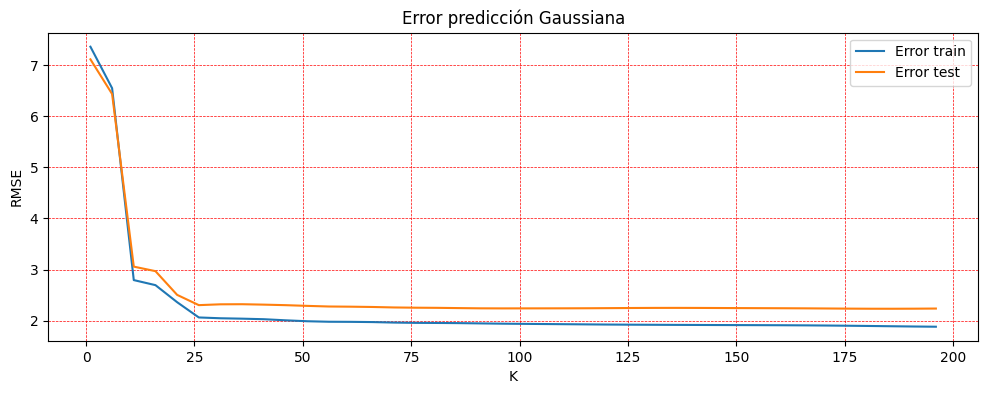

In [17]:
rmse_k(gauss_carac,200,'Error predicción Gaussiana')

La rmse para la función Gaussiana disminuye a medida que aumenta K. Se observa además que esta a diferencia de las otras funciones tiende a tener una disminución mas pronta.  Lo anterior  se debe a que agregar más funciones base, en este caso, más gaussiana, permite capturar mejor los detalles y la complejidad de la función real que se está modelando. Al agregar más funciones, se pueden ajustar mejor los datos y reducir el error cuadrático medio entre las predicciones del modelo y los valores reales. Además, debe tenerse en cuenta que agregar demasiadas funciones puede resultar en un sobreajuste del modelo a los datos de entrenamiento y una disminución en su capacidad de generalización a nuevos datos.

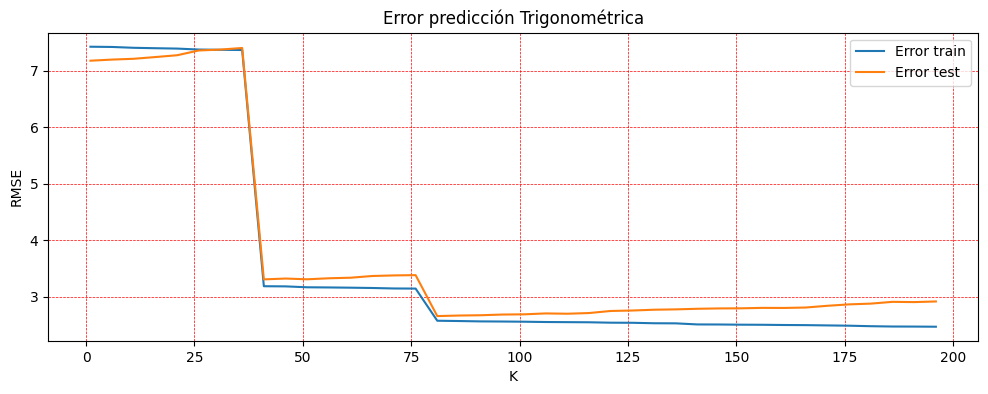

In [18]:
rmse_k(trigo_carac,200,'Error predicción Trigonométrica')

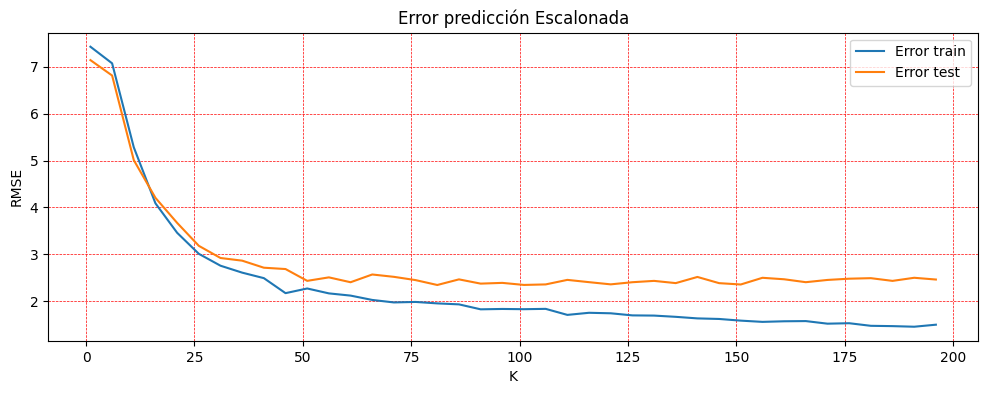

In [19]:
rmse_k(escalonada_carac,200,'Error predicción Escalonada')

En general, la disminución de la raíz del error cuadrático medio (RMSE) a medida que se aumenta el parámetro de complejidad K para los tres modelos de regresión lineal (gaussiano, trigonométrico y escalonado) se debe a la capacidad de los modelos para adaptarse y ajustarse a la curva real de los datos a medida que aumenta el número de características polinomiales.

Sin embargo, la disminución en la RMSE no es lineal y se observa una disminución en la mejora de la precisión a medida que se aumenta K. Esto sugiere que existe un límite en la capacidad de los modelos para adaptarse a los datos y que un modelo demasiado complejo puede resultar en un sobreajuste y una mala generalización a nuevos datos.

En particular, el modelo de regresión lineal gaussiano parece tener una mejor capacidad para ajustarse a los datos y producir una menor RMSE en comparación con los modelos trigonométrico y escalonado. Por otro lado, los modelos trigonométrico y escalonado parecen tener una capacidad limitada para ajustarse a la curva real de los datos, lo que resulta en una mayor RMSE.

**CONCLUSIONES**

1. Después de analizar las diferentes predicciones de regresión lineal utilizando distintas funciones base (gaussiana, trigonométrica y escalonada) para predecir la temperatura media diaria en Delhi, se observa que la función gaussiana se ajusta mejor a los datos y tiene una menor RMSE a medida que se aumenta la complejidad del modelo.

2. La función trigonométrica, por otro lado, presenta una menor capacidad predictiva y una mayor RMSE, lo que indica que no es un buen modelo para este conjunto de datos.

3. La función escalonada también presenta un buen ajuste a los datos, pero no tan bueno como la función gaussiana.

4. En general, se puede concluir que el uso de una función gaussiana como base para la regresión lineal es una buena opción para predecir la temperatura media diaria en Delhi, ya que presenta un buen ajuste y una capacidad predictiva mejor que otras funciones.
5. La máxima verosimilitud se utiliza para encontrar los parámetros de un modelo que mejor describen los datos observados.
6. La RMSE es una medida de la diferencia entre los valores predichos por un modelo y los valores observados en los datos reales.
7. La elección del modelo de regresión más adecuado depende de cómo se ajuste a los datos y de la capacidad de generalización.
8. La minimización de la RMSE es importante para mejorar la precisión de la predicción de un modelo de regresión.
9. La máxima verosimilitud y la RMSE son herramientas útiles en la evaluación de la calidad de ajuste de un modelo de regresión.
10. La elección del modelo adecuado y la optimización de sus parámetros es un proceso iterativo que requiere una combinación de comprensión teórica y habilidades prácticas en la evaluación de los resultados.
11. Por último, tanto la forma secuencial como aleatoria de presentar los datos en el entrenamiento tienen sus ventajas y desventajas. La forma secuencial es determinista y reproducible, mientras que la forma aleatoria previene el sobreajuste pero puede ser más difícil de depurar. Ambas formas dieron una predicción precisa para el modelo presentado en la primera gráfica, lo que indica que ambas formas pueden ser aceptables en situaciones sin sobreajuste.
